## Experiential Task 2
Publicly traded companies announce earnings four times per year. These quarterly announcements convey significant information to the market about the company's performance as well as expectations about performance in the coming period. While Wall Street often focuses on whether earnings-per-share (EPS) "meets or beats" expectations, this metric represents only one data point in the announcement.

Managers supplement announced earnings with a detailed narrative disclosure which provides information helpful for interpreting performance. In this task, we will analyze these narrative disclosures using a few different machine learning approaches. Specifically: 

- We will apply topic modeling to understand the type of language in earnings announcements. 
- We will use Lasso regression to evaluate which topics best predict stock returns.
- We will train a discrete classifier to understand whether earnings announcements can be used to predict large positive returns.

This task will proceed in four general steps:
1. Load the data, pre-process, and extract features needed for our machine learning procedures (20% of grade).
2. Apply LDA to the corpus and inspect the top 5 words associated with each topic (30% of grade).
3. Use Lasso Regression to evaluate which topics most strongly predict stock returns (25% of grade).
4. Use a classifier of your choice to model the extent to which topics or words (your choice) most strongly predict large positive returns (>5% over 3-day period) (25% of grade).

Let's get started!

### Step 1: Prepare the Data
In this step, you should do the following:
1. Load the dataset using pandas. Confirm there are 12,500 rows.
2. Write a function that replaces any financial number with "financial_number. Then the function should filter out "bad" sentences, defined as those with fewer than 5 tokens OR more than 50% financial numbers. 
3. Generate a document term matrix which allows for single words and bigrams. Restrict tokens to only those that are all letters ("alpha") and at least 3 characters, but make sure to allow for "financial_number". Retain the 1,000 most common features, exclude english stop words, and exclude tokens appearing in more than 50% of documents.

#### 1.1 - Load the dataset (ExpTask2Data.csv.gz)
Use pandas to load the dataset, "ExpTask2Data.csv.gz", into a dataframe. Confirm you have 12,500 rows.

In [1]:
# Insert code to load the dataset into a dataframe called "df"
import pandas as pd

df = pd.read_csv('ExpTask2Data.csv.gz')

num_rows = df.shape[0]
print(num_rows)


12500


In [2]:
sample_data = df['ea_text'][0]
sample_data

'EX-99.1 3 a11-28994_1ex99d1. htm EX-99.1   Exhibit 99.1      NEWS RELEASE        C2011-18     DST   Systems, Inc.    333   West 11th Street Kansas   City, MO 64105-1594      NYSE   Symbol: DST   DST   Contacts:  Kenneth   V.  Hager  (816)  435-8603  Vice   President and Chief Financial Officer    Media:    Matthew   Sherman / Nicholas Lamplough  Joele   Frank, Wilkinson Brimmer Katcher   (212)    355-4449    Investors:    Art   Crozier / Jennifer Shotwell / Larry Miller  Innisfree   M&A Incorporated   (212)    750-5833    FOR IMMEDIATE RELEASE \x97 November 2, 2011   DST SYSTEMS, INC.  ANNOUNCES THIRD QUARTER 2011 FINANCIAL RESULTS AND CLOSING OF ALPS ACQUISITION   KANSAS CITY, MO  (November 2, 2011)  \x97 DST Systems, Inc.   (NYSE: DST)  reported consolidated net income attributable to DST  (\x93DST Earnings\x94)  of  $35.3 million  ( $0.76 per diluted share)  for the third quarter 2011 compared to  $54.3 million  ( $1.16 per diluted share)  for the third quarter 2010.   DST Earnings

#### 1.2 - Clean out the "bad" sentences
Fill in the following function based on the criteria given above. I recommend taking the following approach (and I have sketched out a function you can update) but you are free to handle this part of the task as you wish:
- Generate a list of sentences with `sent_tokenize`
- Loop over each sentence
- Identify financial numbers with a regular expression, and replace those with "financial_number".
- Tokenize words in the sentence with `word_tokenize`, and filter out non-alpha or non-"financial_number". Retain good tokens in `good_tokens`.
- Evaluate sentence per the parameters above (5 or more tokens, no more than 50% financial numbers)

In [3]:
import nltk
nltk.download('popular')
nltk.download('punkt_tab')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\rache\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\rache\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\rache\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\rache\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\rache\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

True

In [4]:
import re
from nltk.tokenize import sent_tokenize, word_tokenize

def clean_sentences(txt):
    # add regular expression to "..." to clean out financial numbers:
    clean_txt = re.sub(r"\$\d{1,3}(?:,\d{3})*(?:\.\d{2})?\s*(million|billion)?", "financial_number", txt)
    good_sents = []
    
    # Tokenize text into sentences
    sentences = sent_tokenize(clean_txt)
    
    for sent in sentences:
        good_tokens = []
        words = word_tokenize(sent)
        
        for word in words:
            
            # Convert word to lowercase
            word = word.lower()
            
            # Filter out non-alpha or non-"financial_number" tokens
            if (word.isalpha() and len(word) >= 3) or word == "financial_number":
                good_tokens.append(word)
        
        # Now add logic to check if there are sufficient tokens to keep the sentence:
        if len(good_tokens) >= 5 and good_tokens.count('financial_number') / len(good_tokens) <= 0.5:
            good_sents.append(" ".join(good_tokens))
    
    return " ".join(good_sents)

# Test function on small sample of data
clean_sentences(sample_data)

'htm exhibit news release dst systems west street kansas city nyse symbol dst dst contacts kenneth hager vice president and chief financial officer media matthew sherman nicholas lamplough joele frank wilkinson brimmer katcher investors art crozier jennifer shotwell larry miller innisfree incorporated for immediate release november dst systems inc announces third quarter financial results and closing alps acquisition kansas city november dst systems nyse dst reported consolidated net income attributable dst million diluted share for the third quarter compared million diluted share for the third quarter dst earnings for the nine months ended september were million diluted share compared million diluted share for the nine months ended september taking into account certain adjustments explained herein consolidated dst earnings were million diluted share for third quarter compared million diluted share for third quarter and million diluted share for the nine months ended september compared

Now apply this function to the earnings announcement text ("ea_text"), placing the result in a new dataframe column called "clean_sent" (this will likely take 15-20 minutes, so you may want test your function on a smaller sample before applying to the full dataframe).

In [5]:
df['clean_sent'] = df['ea_text'].apply(clean_sentences)

Before we generate the document term matrix, I'd recommend saving this dataframe so you don't have to re-run that code when continuing:

In [6]:
# To save:
df.to_csv("./task2_data_clean.csv.gz",index=False)

In [7]:
# To load:

import pandas as pd
df = pd.read_csv("./task2_data_clean.csv.gz")

In [8]:
df.head(4)
# df['clean_sent'][2]


,File_Name,ea_text,datacqtr,announce_date,BHAR0_2,clean_sent
0,714603-0001104659-11-059721.txt,EX-99.1 3 a11-28994_1ex99d1. htm EX-99.1 Exh...,2011Q3,10/28/2011,-4.513975,htm exhibit news release dst systems west stre...
1,772897-0000950134-06-020331.txt,EX-99.1 2 c09674exv99w1. htm PRESS RELEASE ex...,2006Q3,11/2/2006,-2.001589,htm press release exhibit media contact invest...
2,775158-0001564590-20-048540.txt,EX-99.1 2 osk-ex991_6. htm EX-99.1 osk-ex99...,2020Q3,10/29/2020,-2.112353,htm exhibit for more information contact finan...
3,16040-0001157523-20-000728.txt,EX-99.1 2 a52217903ex99_1. htm EXHIBIT 99.1 ...,2020Q1,5/11/2020,-9.170058,htm exhibit exhibit cabot corp reports second ...


#### Step 1.3
Now we will generate our document term matrix. Note that you need use `CountVectorizer` since we are going to use LDA. I've provided you the token pattern that will allow financial_number as a single token.

In [9]:

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords

# Define stopwords
stops = stopwords.words('english')

# Update with parameters needed per instructions; I've provided a token_pattern
vec = CountVectorizer(token_pattern = r'\b[a-zA-Z_]{3,}[a-zA-Z]*\b',
                      stop_words = stops, 
                      # allow for single words and bigrams
                      ngram_range = (1,2),
                      max_features = 1000,
                      # exclude tokens appearing in more than 50% of documents
                      max_df = 0.5)

# Fit and transform the data frame column 'clean_sent' to create the document term matrix
dtm = vec.fit_transform(df['clean_sent'])

# Convert the document term matrix to a DF for better readability
dtm_df = pd.DataFrame(dtm.toarray(), columns=vec.get_feature_names_out())

# Display the DTM
print(dtm_df)

       accepted  accepted accounting  access  accessed  accompanying  \
0             1                    1       0         0             0   
1             0                    0       1         0             0   
2             2                    2      18         0             0   
3             1                    1       0         1             1   
4             0                    0       2         1             0   
...         ...                  ...     ...       ...           ...   
12495         0                    0       0         0             2   
12496         0                    0       0         1             0   
12497         0                    0       0         2             0   
12498         1                    0       0         0             0   
12499         1                    1       0         1             0   

       accordance gaap  accounting principles  accounts receivable  \
0                    1                      1                    

### Step 2: Fitting the LDA Model
Next, we're going to generate topics from our document term matrix using LDA. We'll do this step in four parts:
1. Fitting LDA model over a range of topics
2. Evaluating diagnostics to select "best" choice
3. Fit a final model and generate topic scores
4. Evaluate top 5 words in each topic

#### 2.1 - Tuning LDA
As in demo 5A, I suggest using `sklearn`'s implementation of LDA, which is the best option for generating topical relevance at the document level. We need to do a little tuning for our model. I recommend doing this on a smaller sample of 5,000 records to save time. You should try between 40 and 150 topics, counting by 10s. You should set `topic_word_prior` equal to 0.15 and `doc_topic_prior` to 25 divided by the number of topics. Finally, we will use the coherence score, `u_mass`, as in demo 5A to evaluate topic quality. 

I've set up a tuning loop for you to use. Fill in the code as needed:

In [10]:
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation as LDA
from tmtoolkit.topicmod.evaluate import metric_coherence_gensim
import numpy as np

# Convert dtm to dense matrix
big_dense = pd.DataFrame(dtm.todense())

# Select a sample of 5000 for the training set; use random_state=123
sample = big_dense.sample(5000, random_state=123)

# Set up "vocab"
vocab = np.array(vec.get_feature_names_out())

# Set up empty list to collect diagnostics
records = []

for top in range(40, 151, 10): 
    
    print(f"Fitting {top} topics")
    record = {'topics':top}
    
    # Fill in missing parameters
    lda = LDA(n_components = top,
            topic_word_prior = 0.15,
            doc_topic_prior = 25/top,
            n_jobs = -1,
            random_state = 123)

    lda.fit(sample)# Add code to fit the the model
    
    record['perplexity'] = lda.perplexity(sample)
        
    ## Add code to compute umass, add mean umass to "record", and collect record in list
    umass = metric_coherence_gensim(measure='u_mass', top_n = 5, topic_word_distrib = lda.components_, dtm= dtm.todense(), vocab=vocab, texts = None)
    record['mean_umass'] = np.mean(umass)
    records.append(record)
        
diagnostics = pd.DataFrame(records)
        

Fitting 40 topics
Fitting 50 topics
Fitting 60 topics
Fitting 70 topics
Fitting 80 topics
Fitting 90 topics
Fitting 100 topics
Fitting 110 topics
Fitting 120 topics
Fitting 130 topics
Fitting 140 topics
Fitting 150 topics


In [11]:
print(diagnostics)

    topics  perplexity  mean_umass
0       40  565.685533   -0.928709
1       50  558.584598   -0.984608
2       60  550.959722   -0.989478
3       70  544.679449   -1.015096
4       80  539.941536   -0.935761
5       90  534.751388   -0.925491
6      100  532.848948   -0.940369
7      110  529.000315   -0.943284
8      120  527.276269   -0.968883
9      130  523.445583   -0.948072
10     140  520.801716   -0.944503
11     150  518.688645   -0.990671


#### 2.2 - Evaluating `umass` and selecting number of topics for final model
In this step, you should plot `umass` over the range of topics ran in the previous step. Show your plot and then choose the optimum number of topics based on your plot. You are free to use whatever plotting approach you wish. 

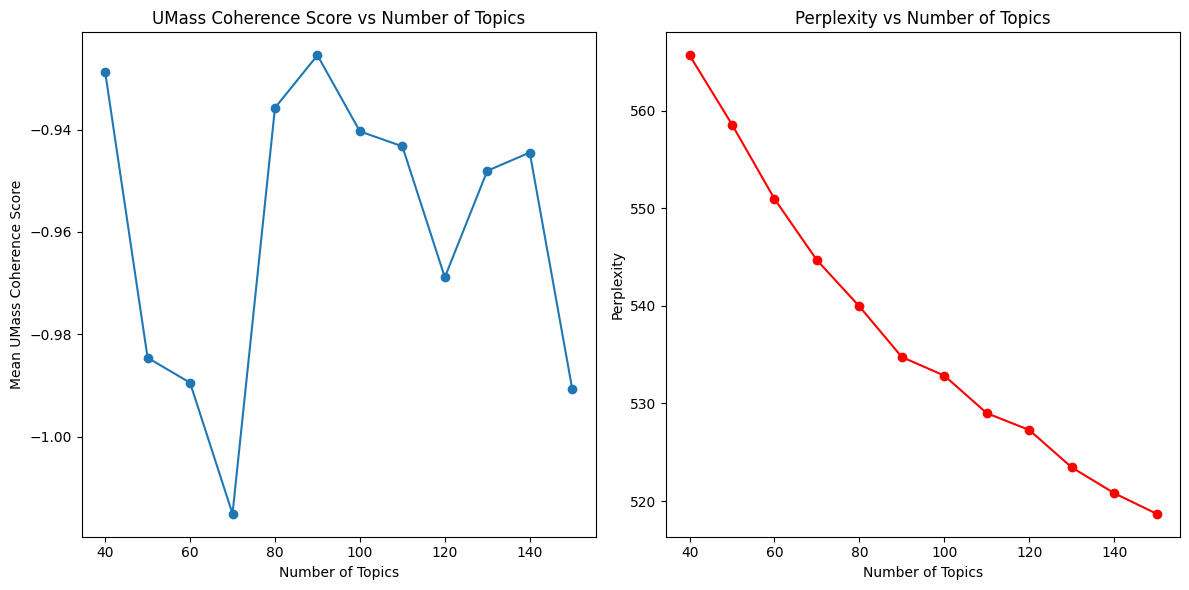

The optimum number of topics is 90


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation as LDA
from gensim.models.coherencemodel import CoherenceModel

# Plotting the UMass coherence scores
num_topics = [record['topics'] for record in records]
mean_umass = [record['mean_umass'] for record in records]
perplexities = [record['perplexity'] for record in records]

# Plotting the UMass coherence scores
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(num_topics, mean_umass, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Mean UMass Coherence Score')
plt.title('UMass Coherence Score vs Number of Topics')

# Plotting the perplexity scores
plt.subplot(1, 2, 2)
plt.plot(num_topics, perplexities, marker='o', color='r')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity')
plt.title('Perplexity vs Number of Topics')

plt.tight_layout()
plt.show()

# Choosing the optimum number of topics
optimum_topics = num_topics[np.argmax(mean_umass)]
print(f'The optimum number of topics is {optimum_topics}')

**Interpret your plot and comment on the number of topics you plan to use:**

*My answer:* The optimal number of topics is 90, with the highest UMASS Coherence Score of -0.9254913015898836, or approximately -0.925.  Higher scores indicate a better coeherence, which means that the words within a topic frequently appear together in the original documents, suggesting the topic is meaningful and well-defined.  The UMASS coeherence score is negative, because it is based on the logarithm of probabilities.  Since logs of probabilities (which are less than 1) are negative, it is normal for the UMASS score to be negative.

When the number of topics increases, the model has more flexibility to capture the underlying structure of data, which can lead to a decrease in perplexity.  The model can better explain the data with more topics, resulting in lower perplexity score.  However, too many topics can be overfitting, where the model may capture too much noise rather than the true underlying patterns.  

#### Step 2.3
Now, fit a final LDA model using the number of topics chosen in the prior step and use it to transform the data.

In [13]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
# Set up final lda model:
final_lda = LDA(n_components = optimum_topics,
                topic_word_prior = 0.15,
                doc_topic_prior= 25/optimum_topics,
                n_jobs = -1,
                random_state = 123)

# Fit final model 
final_lda.fit(big_dense)

# Transform 
topics = final_lda.transform(big_dense)

# Convert the result back into a Data Frame
doc_topic_df = pd.DataFrame(topics, index=big_dense.index, columns=[f'Topic {i+1}' for i in range(final_lda.n_components)])

# Display the resulting DataFrame
print(doc_topic_df.head())



    Topic 1   Topic 2   Topic 3   Topic 4   Topic 5   Topic 6   Topic 7  \
0  0.010779  0.000161  0.000164  0.000168  0.000164  0.000167  0.000173   
1  0.000505  0.089533  0.000501  0.000490  0.000500  0.000510  0.000509   
2  0.071851  0.000312  0.000307  0.008188  0.033314  0.001878  0.000314   
3  0.129925  0.008908  0.000203  0.010217  0.004187  0.000204  0.000210   
4  0.001015  0.001018  0.001009  0.000988  0.000975  0.001215  0.004693   

    Topic 8   Topic 9  Topic 10  ...  Topic 81  Topic 82  Topic 83  Topic 84  \
0  0.005890  0.000165  0.000166  ...  0.085194  0.000171  0.000164  0.000168   
1  0.000491  0.013977  0.124017  ...  0.014893  0.000495  0.000499  0.034711   
2  0.000305  0.000309  0.069025  ...  0.045681  0.000306  0.000312  0.000309   
3  0.000202  0.000211  0.000213  ...  0.002571  0.000209  0.081348  0.000208   
4  0.049311  0.000986  0.084280  ...  0.000955  0.000973  0.000988  0.000986   

   Topic 85  Topic 86  Topic 87  Topic 88  Topic 89  Topic 90  
0  0

#### 2.4 - Evaluate topic words
The final step in this part of the task is to evaluate the words in your topics. Word intrusion tasks are a good way to validate topics in an objective manner. We will not follow through on a full word intrusion task, but I would like you to display the top 5 words in each topic and a randomly chosen word from the vocabulary, separately identified as an intruder.

Fill in this code to generate the top 5 words in each topic plus an intruder:

In [14]:
import random
topn = 5

# You need these two objects:
vocab = np.array(vec.get_feature_names_out())
top_word = final_lda.components_

# Insert code to perform the intrusion task
for topic_idx, topic in enumerate(top_word):
    top_words = [vocab[i] for i in topic.argsort()[:-topn - 1:-1]]
    intruder = random.choice(vocab)
    while intruder in top_words:
        intruder = random.choice(vocab)
    print(f"Topic {topic_idx + 1}: {top_words} + Intruder: {intruder}")

Topic 1: ['ebitda', 'net tax', 'compared financial_number', 'restructuring', 'extinguishment'] + Intruder: share compared
Topic 2: ['issued', 'authorized', 'par', 'par value', 'shares authorized'] + Intruder: parts
Topic 3: ['fuel', 'aircraft', 'cents', 'air', 'fleet'] + Intruder: six
Topic 4: ['currency', 'foreign currency', 'foreign', 'translation', 'currency translation'] + Intruder: research development
Topic 5: ['october', 'third quarter', 'nine', 'nine months', 'september'] + Intruder: forward
Topic 6: ['days', 'fleet', 'day', 'revenue per', 'per day'] + Intruder: generate
Topic 7: ['fiscal', 'software', 'fiscal year', 'systems', 'financial measure'] + Intruder: dollar
Topic 8: ['group', 'consulting', 'home', 'health', 'million diluted'] + Intruder: adjustment
Topic 9: ['dollars thousands', 'dollars', 'income per', 'net sales', 'adjusted operating'] + Intruder: useful investors
Topic 10: ['prices', 'manufacturing', 'volume', 'plant', 'raw'] + Intruder: subsidiary
Topic 11: ['bill

### Step 3: Using Lasso to evaluate topic informativeness
In this portion of the task, you'll use Lasso regression to evaluate which topics exhibit the strongest associations with stock returns, which is labeled as "BHAR0_2" (or buy-and-hold abnormal returns from days 0 to 2). Note that this column is in percentage points (i.e., -4.5 indicates a return of -4.5%).

You should proceed as follows:
1. Identify the optimum out-of-sample value for `alpha` (the primary regularization parameter) using `RandomizedSearchCV`. You should try 100 random values in the range between 0.00001 and 0.02.
2. Analyze results of the best fit models. How many topics exhibit non-zero associations with returns? Which topic exhibits the strongest negative and positive associations (two total)?

#### 3.1 - Tuning the Lasso model
To tune the model, you first need do split your data into a training and testing sample. I've set most of this up for you; Replace `X` and `Y` with the datasets needed to conduct this test and update the function have a training sample of 80% and validation sample of 20%:

In [15]:
from sklearn.model_selection import train_test_split

Xtopic_train, Xtopic_test, Ytopic_train, Ytopic_test = train_test_split(topics, df['BHAR0_2'],train_size=0.80,random_state=123)

Next, you should set up your lasso model, parameter grid, and randomized searcher. Use these parameters for the search:
- You parameter grid should include 100 random values for `alpha` between 0.00001 and 0.02. 
- Your randomized search should run 50 times and use 5-fold cross-validation. 
- You should use `neg_root_mean_squared_error` for scoring.
- You should use `random_state=123` wherever possible.

Fill in the code below to set this up:

In [16]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Lasso

np.random.seed(123)

# Define the Parameter grid
param_grid = {'random_state':[123],
              'alpha':np.random.uniform(0.00001, 0.02, 100)}

# Initialize the Lasso model
lasso = Lasso(random_state = 123)

# Set up the randomized search with cross validation
rus = RandomizedSearchCV(estimator=lasso,
                        param_distributions=param_grid,
                        n_iter=50,
                        cv=5,
                        scoring='neg_root_mean_squared_error',
                        random_state = 123,
                        n_jobs = -1 
                        )
rus.fit(Xtopic_train, Ytopic_train)

# Output the best parameters and score
print("Best parameters found: ", rus.best_params_)
print("Best score: ", rus.best_score_)

Best parameters found:  {'random_state': 123, 'alpha': 0.005729925305658085}
Best score:  -9.268702531949462


To evaluate performance by `alpha`, prepare a scatter plot that shows the validation `neg_root_mean_squared_error` vs. `alpha` (**HINT**: results from the randomized search are in `rus.cv_results_`, which is a dictionary).

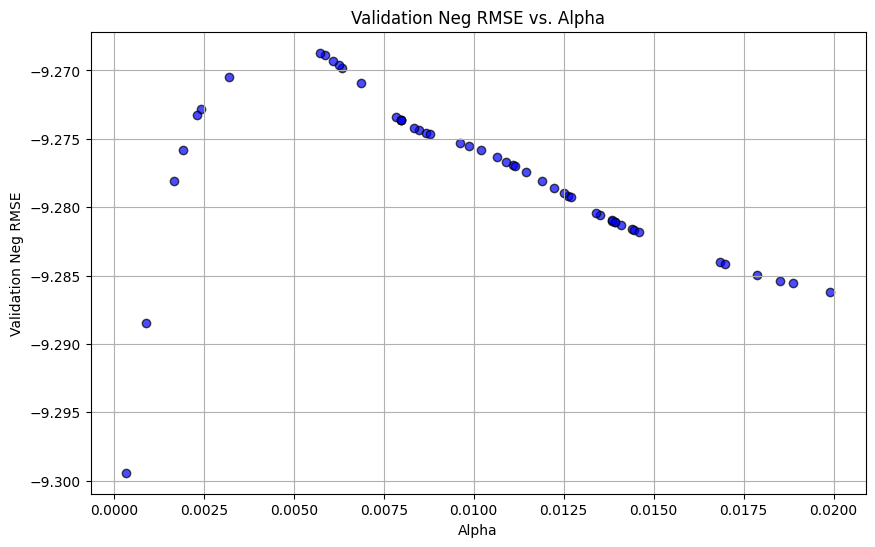

In [17]:
import matplotlib.pyplot as plt

# Extract the results from the randomized search
results = rus.cv_results_

# Get the alpha values and corresponding scores
alphas = results['param_alpha']
scores = results['mean_test_score']

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(alphas, scores, color='blue', edgecolor='k', alpha=0.7)
plt.xlabel('Alpha')
plt.ylabel('Validation Neg RMSE')
plt.title('Validation Neg RMSE vs. Alpha')
plt.grid(True)
plt.show()

Now print the optimum value for `alpha`:

In [18]:
print(f"Best alpha: {rus.best_params_['alpha']}")

Best alpha: 0.005729925305658085


#### 3.2 Interpreting Lasso results
To finish up this step, I'd like you to identify:

1. How many coefficients (each of which corresponds to a topic) are non-zero
2. Which topic has the most negative coefficient?
3. Which topic has the most positive coefficient?

Let's start with non-zero coefficients. Fill in the cell below to print out the number of coefficients not equal to zero:

In [19]:
# Fit the best Lasso model on the training data
best_lasso = rus.best_estimator_
best_lasso.fit(Xtopic_train, Ytopic_train)

# Get the coefficients
coefficients = best_lasso.coef_

# Count the number of non-zero coefficients
non_zero_coefficients = np.sum(coefficients != 0)
print(f"Number of non-zero coefficients: {non_zero_coefficients}")

Number of non-zero coefficients: 14


Now identify the most positive and most negative topics and print associated words (**HINT**: `argmax()` and `argmin()` make this very straightforward). 

Print out both the values of these coefficients and their indices:

In [20]:
# Find the topic with the most positive coefficient
most_pos = np.argmax(coefficients)
most_pos_value = coefficients[most_pos]


# Find the topic with the most negative coefficient
most_neg = np.argmin(coefficients)
most_neg_value = coefficients[most_neg]

print(f"The most positive coefficient corresponds to topic {most_pos + 1} and has a value {most_pos_value}.")
print(f"The most negative coefficient corresponds to topic {most_neg + 1} and has a value {most_neg_value}.")

The most positive coefficient corresponds to topic 14 and has a value 2.449107187822597.
The most negative coefficient corresponds to topic 90 and has a value -10.118678740758732.


Now, print the top 5 words corresponding to each of these two topics:

In [21]:
# Get the top 5 words for the most positive topic
positive_words = [vocab[i] for i in top_word[most_pos].argsort()[:-topn - 1:-1]]
print(f"[Most positive coefficient] Topic {most_pos + 1} words: {'|'.join(positive_words)}")

# Get the top 5 words for the most negative topic
negative_words = [vocab[i] for i in top_word[most_neg].argsort()[:-topn - 1:-1]]
print(f"[Most negative coefficient] Topic {most_neg + 1} words: {'|'.join(negative_words)}")

[Most positive coefficient] Topic 14 words: net sales|gross profit|sales million|industries|sales increased
[Most negative coefficient] Topic 90 words: net loss|loss per|loss million|loss income|operating loss


**QUESTION**: Do you find this answer intuitive? Why or why not?

*INSERT ANSWER HERE*: The top 5 words for the topics corresponding to the most postive and most negative coefficients are intuitive.  Topic 14 is positively correlated with higher percentage returns in BHAR0_2 stock returns, with words that are related to higher profits (net sales, gross profit, sales million, industries, sales increased) while Topic 90 is negatively correlated with the amount of BHARO_2 stock returns, with words related to negative financial performance (net loss, loss per, loss million, loss income, operating loss).  The positive/negative sentiment of the topics respectively match if they are positively/negatively correlated with BHAR0_2 stock returns. 

### Step 4: Use a classifier to predict large positive returns
The final part of this task is to use a classifier of your choice to predict large positive returns. You can use the document-term matrix or topic-matrix. You're also free to tune the model as you wish. Training classifiers can be time consuming, so I'm going to use an approach to this section called *specification grading*, meaning you can choose to omit parts of the process for a reduced grade.

Grading for this part will be done as follows:

1. Set up, train, and evaluate at least one classifier: If this portion is done perfectly and nothing else is done, you'll receive 50% credit for this part.
2. Apply robust tuning procedures to one or more models: If you tune multiple hyperparameters for the one model you fit in step 1, you'll receive an additional 10-20% (max grade 70%) credit, depending on extent of tuning. If you tune two or more models properly, this scale increases to 20-40% (max grade 90%).
3. Finally, the last 10% will be based on your best fit model. Specifically, using the validation data set up below, you should print your classification report. The best macro-F1 score in the class will receive 10% (100% cumulative) second best 9.5%, and so forth.

#### 4.1 - Data set-up an single model training
I'll help you set up the data so we all start from the same place. Note that I'm going to set up two sets of "X" data, one based on the DTM and the other on the topic matrix. You can use either (or both if you consider multiple models):

In [22]:
YLR = (df['BHAR0_2']>5).astype(int)
train_Xdtm, test_Xdtm, train_Xtopic, test_Xtopic, train_YLR, test_YLR = train_test_split(np.asarray(dtm.todense()),topics,YLR,train_size=0.80,random_state=123)

Next, you should fill in the cell below with code to train at least one model:

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the classifier
classifier = RandomForestClassifier(random_state=123)

# Train the classifier
classifier.fit(train_Xdtm, train_YLR)

# Make predictions
predictions = classifier.predict(test_Xdtm)

# Calculate accuracy
accuracy = accuracy_score(test_YLR, predictions)
print(f'Accuracy: {accuracy}')

# Print classification report
print(classification_report(test_YLR, predictions))

Accuracy: 0.7588
              precision    recall  f1-score   support

           0       0.77      0.98      0.86      1904
           1       0.45      0.06      0.10       596

    accuracy                           0.76      2500
   macro avg       0.61      0.52      0.48      2500
weighted avg       0.69      0.76      0.68      2500



#### 4.2 - Model Tuning
Here, you should insert code you use to tune your classifier. You can insert additional cells if needed, or skip this step and accept a lower grade if desired.

In [24]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the classifier
classifier = RandomForestClassifier(random_state=123)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(train_Xdtm, train_YLR)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Train the classifier with the best parameters
best_classifier = grid_search.best_estimator_

# Make predictions
predictions = best_classifier.predict(test_Xdtm)

# Calculate accuracy
accuracy = accuracy_score(test_YLR, predictions)
print(f'Accuracy: {accuracy}')

# Print classification report
print(classification_report(test_YLR, predictions))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters: {'min_samples_leaf': 4, 'min_samples_split': 10}
Accuracy: 0.762
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      1904
           1       0.53      0.02      0.03       596

    accuracy                           0.76      2500
   macro avg       0.65      0.51      0.45      2500
weighted avg       0.71      0.76      0.67      2500



In [25]:
# Fit the model to the training data 
grid_search.fit(train_Xdtm, train_YLR)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [26]:
# Best parameter and best score
print(f'Best C parameter: {grid_search.best_params_}')
print(f'Best cross-validation score: {grid_search.best_score_}')

# Make predictions using the best model
best_model = grid_search.best_estimator_
predictions = best_model.predict(test_Xdtm)

# Evaluate the model
accuracy = accuracy_score(test_YLR, predictions)
print(f'Accuracy: {accuracy}')

Best C parameter: {'min_samples_leaf': 4, 'min_samples_split': 10}
Best cross-validation score: 0.7575000000000001
Accuracy: 0.762


#### 4.3 - Report final classification report
Here, you should report your final classification report:

In [27]:
from sklearn.metrics import classification_report
print(classification_report(test_YLR,best_model.predict(test_Xdtm)))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      1904
           1       0.53      0.02      0.03       596

    accuracy                           0.76      2500
   macro avg       0.65      0.51      0.45      2500
weighted avg       0.71      0.76      0.67      2500

